# Importing libraries

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing dataset

In [71]:
data = pd.read_csv("Fish.csv")

# Visualize dataset

In [72]:
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [73]:
data.Species.value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

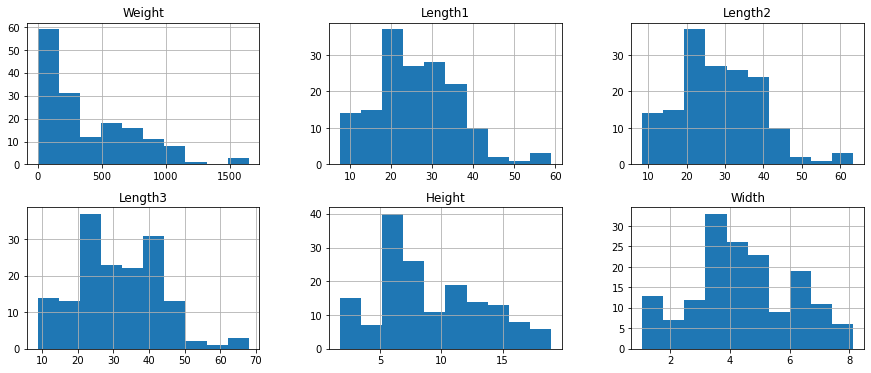

In [74]:
data_num = data.drop(columns=["Species"])

fig, axes = plt.subplots(len(data_num.columns)//3, 3, figsize=(15, 6))
i = 0
for triaxis in axes:
    for axis in triaxis:
        data_num.hist(column = data_num.columns[i], ax=axis)
        i = i+1

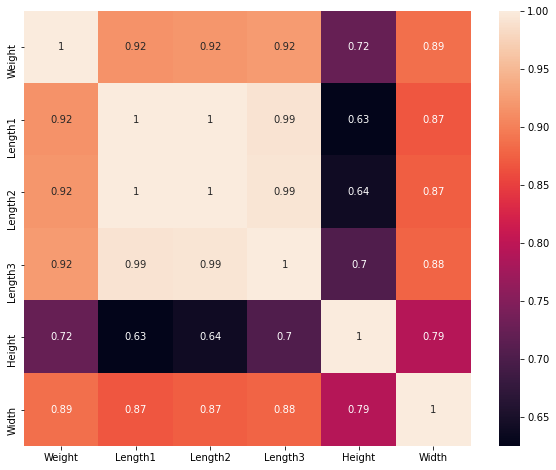

In [75]:
plt.figure(figsize=(10,8))
corr = data_num.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)
plt.show()

# Splitting and cleaning the data

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

ct = make_column_transformer(
    (StandardScaler(),['Length1','Length2','Length3','Height','Width']), #turn all values from 0 to 1
    (OneHotEncoder(handle_unknown="ignore"), ["Species"])
)
#create X and y values
data_cleaned =   data.drop("Weight",axis=1)
y = data['Weight']

x_train, x_test, y_train, y_test = train_test_split(data_cleaned,y, test_size=0.3, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
X_train_normal = pd.DataFrame(ct.fit_transform(x_train))
X_test_normal = pd.DataFrame(ct.transform(x_test))

(111, 6) (48, 6) (111,) (48,)


# Training the model

In [77]:
def models_score(model_name, train_data, y_train, val_data,y_val):
    model_list = ["Linear_Regression"]
    
    if model_name=="Linear_Regression":
        reg = LinearRegression()
    
    if model_name in model_list:
        reg.fit(train_data,y_train)
        pred = reg.predict(val_data)
     
        score_MSE = mean_squared_error(pred, y_val)
        score_MAE = mean_absolute_error(pred, y_val)
        score_r2score = r2_score(pred, y_val)
        return round(score_MSE,2), round(score_MAE,2), round(score_r2score,2)
model_list = ["Linear_Regression"]
result_scores = []
for model in model_list:
    score = models_score(model,X_train_normal,y_train, X_test_normal,y_test)
    result_scores.append((model, score[0], score[1],score[2]))
    print(model,score)

Linear_Regression (7595.58, 68.26, 0.93)


# Evaluating the data

In [78]:
df_result_scores = pd.DataFrame(result_scores,columns=["model","mse","mae","r2score"])
df_result_scores

,model,mse,mae,r2score
0,Linear_Regression,7595.58,68.26,0.93


# Visualizing the data

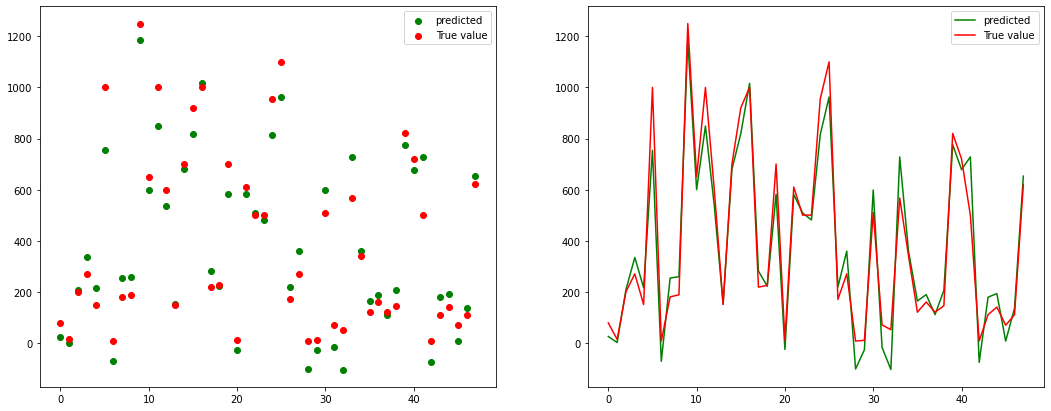

In [79]:
reg = LinearRegression()
reg.fit(X_train_normal,y_train)
pred = reg.predict(X_test_normal)
plt.figure(figsize=(18,7))
plt.subplot(1, 2, 1) 
plt.scatter(range(0,len(X_test_normal)), pred,color="green",label="predicted")
plt.scatter(range(0,len(X_test_normal)), y_test,color="red",label="True value")
plt.legend()

plt.subplot(1, 2, 2) 
plt.plot(range(0,len(X_test_normal)), pred,color="green",label="predicted")
plt.plot(range(0,len(X_test_normal)), y_test,color="red",label="True value")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Actual VS Predicted')

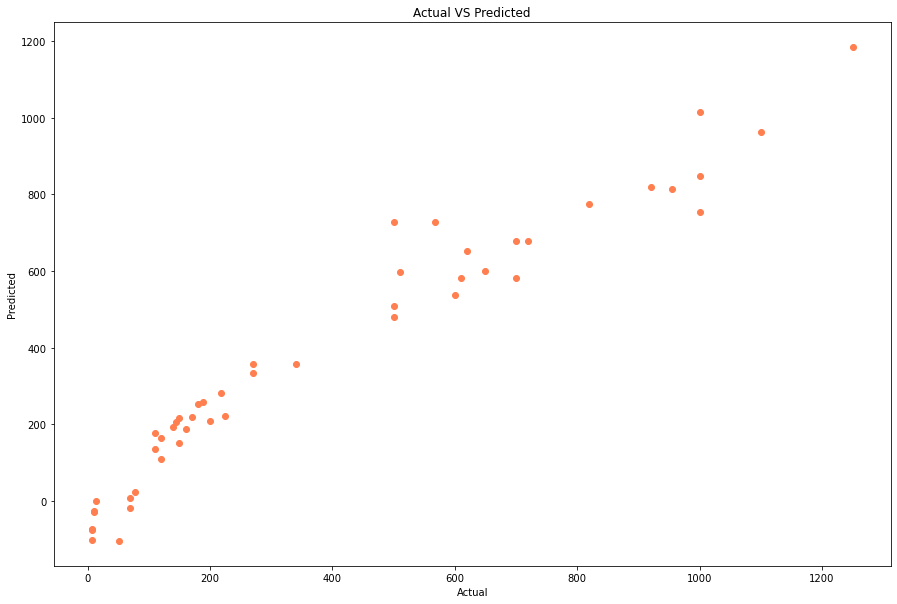

In [80]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test,pred, c='coral')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual VS Predicted')

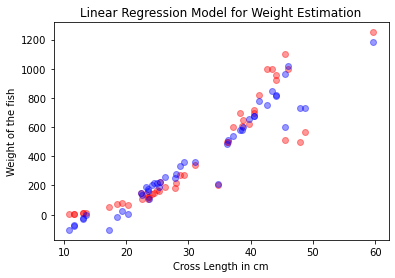

In [81]:
plt.scatter(x_test['Length3'], y_test, color='red', alpha=0.4)
plt.scatter(x_test['Length3'], pred, color='blue', alpha=0.4)
plt.xlabel('Cross Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');


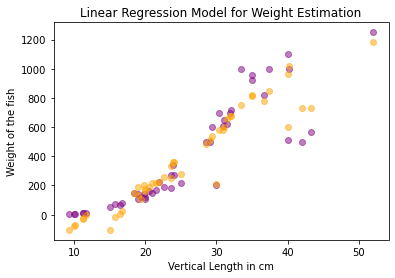

In [82]:
plt.scatter(x_test['Length1'], y_test, color='purple', alpha=0.5)
plt.scatter(x_test['Length1'], pred, color='orange', alpha=0.5)
plt.xlabel('Vertical Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');

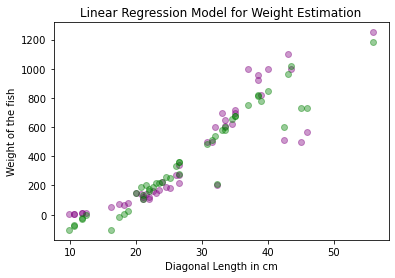

In [83]:
plt.scatter(x_test['Length2'], y_test, color='purple', alpha=0.4)
plt.scatter(x_test['Length2'], pred, color='green', alpha=0.4)
plt.xlabel('Diagonal Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');

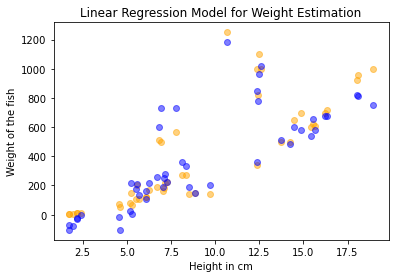

In [84]:
plt.scatter(x_test['Height'], y_test, color='orange', alpha=0.5)
plt.scatter(x_test['Height'], pred, color='blue', alpha=0.5)
plt.xlabel('Height in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');

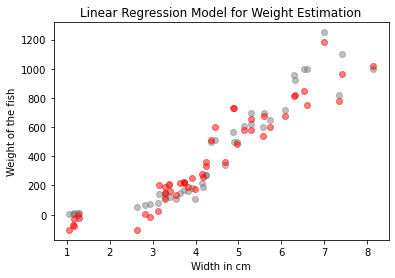

In [85]:
plt.scatter(x_test['Width'], y_test, color='gray', alpha=0.5)
plt.scatter(x_test['Width'], pred, color='red', alpha=0.5)
plt.xlabel('Width in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');

In [86]:
pred_y_data=pd.DataFrame({'Actual Value':y_test,'Predicted Value':pred,'Difference':y_test-pred})
pred_y_data[0:20]

,Actual Value,Predicted Value,Difference
78,78.0,24.748770,53.251230
155,13.4,1.094022,12.305978
128,200.0,208.528675,-8.528675
55,270.0,334.301873,-64.301873
94,150.0,215.618301,-65.618301
29,1000.0,753.638686,246.361314
147,7.0,-72.379607,79.379607
51,180.0,253.789788,-73.789788
98,188.0,259.042883,-71.042883
141,1250.0,1185.087098,64.912902
